**This notebook provide the best practices to consume covid-lake API.**

In [5]:
# General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

#!pip install scipy
from scipy.stats import pearsonr

In [6]:
# Plotting functions
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[ANALISE-EXPLORATORIA]/python_plotting_functions.ipynb

In [7]:
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[UTILS]/dremio-access-new.py

dremio = DremioQueryMakerJDBC()
index = dremio.getIndex()
display(index)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,VIEW_DEFINITION
0,DREMIO,Covid-Lake,Disease_Indicator,"SELECT createdOn, identifier, valueString, val..."
1,DREMIO,Covid-Lake,hospitalizações,"SELECT * FROM ""hospitalizacoes.csv"""
2,DREMIO,Covid-Lake,Institution,SELECT * FROM logical_entity
3,DREMIO,Covid-Lake,News&Trends,SELECT * FROM logical_entity
4,DREMIO,Covid-Lake,Socioeconomic_Factors,"SELECT createdOn, clean_data_to_FLOAT(valueStr..."
5,DREMIO,covidlake-raw,brasil_io,"SELECT *\nFROM ""brasil.io"""
6,DREMIO,covidlake-raw,cities,"SELECT * FROM ""Base Coordenadas Brasil.parquet"""
7,DREMIO,covidlake-raw,fiocruz_infogripe,SELECT * FROM fiocruz_infogripe
8,DREMIO,covidlake-raw,google_trends,"SELECT * FROM ""google_trends.parquet"""
9,DREMIO,covidlake-raw,health_ministry,SELECT * FROM health_ministry


In [14]:
brasil_io = dremio.getTable(19)
brasil_io.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
0,17378,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,3550308.0,0.00816,0.0,2680
1,17377,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,3550308.0,0.00816,0.0,2680
2,17376,2020-02-27,SP,São Paulo,city,1,0,3,False,12252023.0,3550308.0,0.00816,0.0,2680
3,17375,2020-02-28,SP,São Paulo,city,2,0,4,False,12252023.0,3550308.0,0.01632,0.0,2680
4,17374,2020-02-29,SP,São Paulo,city,2,0,5,False,12252023.0,3550308.0,0.01632,0.0,2680


In [9]:
brasil_io.dtypes

createdOn              object
identifier             object
subjectTypeLocation     int64
valueString             int64
valueType_display      object
locationId              int64
addressCountry         object
addressState           object
addressCity            object
addressType_display    object
dtype: object

In [10]:
"""sada."s"."fd".s."fgj".k"""

'sada."s"."fd".s."fgj".k'

In [6]:
brasil_io.shape

(107985, 14)

## exploreEntity

Presents an overview of the tables existing in the covid-lake.

URL: http://23.20.157.201/api/exploreEntity

*Each Table represents a CDM (Common Data Model) because it encompesses a set of dataset collected from different sources and mapped following a standard enitity.*

### Let's play with Data :)

- **Analyzing brasil.io dataset**

Checking all columns

In [7]:
all_columns = brasil_io.columns.values.tolist()
len(all_columns)
#all_columns

14

In [8]:
all_columns

['index',
 'date',
 'state',
 'city',
 'place_type',
 'confirmed',
 'deaths',
 'order_for_place',
 'is_last',
 'estimated_population_2019',
 'city_ibge_code',
 'confirmed_per_100k_inhabitants',
 'death_rate',
 'location_id']

Verifying all NAs

In [9]:
# count NAs per column
#brasil_io.isnull().sum()
brasil_io.isna().sum()

index                                0
date                                 0
state                                0
city                                 0
place_type                           0
confirmed                            0
deaths                               0
order_for_place                      0
is_last                              0
estimated_population_2019            6
city_ibge_code                       6
confirmed_per_100k_inhabitants    2748
death_rate                           0
location_id                          0
dtype: int64

Dropping all NAs

In [10]:
# shows all NAs
#base_unif.isna()

# remove columns full of NAs
brasil_io = brasil_io.dropna(axis=1,how='all')
brasil_io.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
0,17378,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,3550308.0,0.00816,0.0,2680
1,17377,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,3550308.0,0.00816,0.0,2680
2,17376,2020-02-27,SP,São Paulo,city,1,0,3,False,12252023.0,3550308.0,0.00816,0.0,2680
3,17375,2020-02-28,SP,São Paulo,city,2,0,4,False,12252023.0,3550308.0,0.01632,0.0,2680
4,17374,2020-02-29,SP,São Paulo,city,2,0,5,False,12252023.0,3550308.0,0.01632,0.0,2680


In [11]:
brasil_io.shape

(107985, 14)

Verifying the duplicated columns

In [12]:
# drop duplicates
#base_unif2 = drop_duplicates(base_unif)
brasil_io = brasil_io.drop_duplicates() 
brasil_io.head()
# no duplicates

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
0,17378,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,3550308.0,0.00816,0.0,2680
1,17377,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,3550308.0,0.00816,0.0,2680
2,17376,2020-02-27,SP,São Paulo,city,1,0,3,False,12252023.0,3550308.0,0.00816,0.0,2680
3,17375,2020-02-28,SP,São Paulo,city,2,0,4,False,12252023.0,3550308.0,0.01632,0.0,2680
4,17374,2020-02-29,SP,São Paulo,city,2,0,5,False,12252023.0,3550308.0,0.01632,0.0,2680


In [13]:
brasil_io.shape

(107985, 14)

Shows all the data, though it runs quite slow for big datasets

In [14]:
#force_show_all_columns(base_unif)

Describe the dataset

In [15]:
brasil_io.describe()

,index,confirmed,deaths,order_for_place,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
count,107985.000000,107985.000000,107985.000000,107985.000000,1.079790e+05,1.079790e+05,105237.000000,107985.000000,107985.000000
mean,43113.577960,64.635449,4.169505,22.580923,9.278069e+04,3.234923e+06,62.329736,0.070271,2039.851544
std,32517.396579,862.638598,69.244757,16.902629,4.379102e+05,9.423678e+05,152.118616,0.185253,1244.737750
min,42.000000,0.000000,0.000000,1.000000,8.370000e+02,1.100015e+06,0.008160,0.000000,1.000000
25%,18226.000000,1.000000,0.000000,9.000000,1.121900e+04,2.602803e+06,7.170260,0.000000,976.000000
50%,36498.000000,4.000000,0.000000,19.000000,2.480400e+04,3.200607e+06,18.716080,0.000000,2060.000000
75%,55736.000000,15.000000,1.000000,33.000000,6.078100e+04,4.106407e+06,54.533890,0.050000,3170.000000
max,163689.000000,71453.000000,4805.000000,93.000000,1.225202e+07,5.300108e+06,14148.174240,1.000000,4310.000000


Describe the fields

In [16]:
brasil_io['state'].unique()
#list(brasil_io['state'].unique())

array(['SP', 'RJ', 'BA', 'DF', 'MG', 'AL', 'RS', 'SC', 'RN', 'PR', 'PE',
       'GO', 'AM', 'SE', 'MS', 'CE', 'AC', 'TO', 'PA', 'PB', 'PI', 'ES',
       'RO', 'MT', 'MA', 'AP', 'RR'], dtype=object)

In [17]:
brasil_io['state'].describe()

count     107985
unique        27
top           SP
freq       19755
Name: state, dtype: object

In [18]:
brasil_io['city'].unique()
#list(brasil_io['state'].unique())

array(['São Paulo', 'Barra Mansa', 'Rio de Janeiro', ..., 'Teolândia',
       'Tremedal', 'Uibaí'], dtype=object)

In [19]:
brasil_io['city'].describe()

count        107985
unique         4177
top       São Paulo
freq             87
Name: city, dtype: object

Frequency of each state

In [20]:
# array with each count    
counts = np.unique(brasil_io['state'], return_counts=True)

# dataframe
state_count = pd.DataFrame({'state': counts[0], 'freq': counts[1]})
state_count.sort_values(by=['freq'], inplace=True,ascending=False)
state_count.head()

,state,freq
25,SP,19755
10,MG,12321
22,RS,9105
23,SC,6421
4,BA,6226


In [21]:
state_count.tail()

,state,freq
20,RO,598
3,AP,571
0,AC,384
21,RR,296
6,DF,74


Frequency of each city

In [22]:
# array with each count    
counts = np.unique(brasil_io['city'], return_counts=True)

# dataframe
region_count = pd.DataFrame({'city': counts[0], 'freq': counts[1]})
region_count.sort_values(by=['freq'], inplace=True,ascending=False)
region_count.head()

,city,freq
3737,São Paulo,87
1183,Divinópolis,80
2132,Maceió,78
3358,Santana de Parnaíba,77
1665,Ipatinga,76


In [23]:
region_count.tail()

,city,freq
3262,Santa Carmem,1
3149,Rio Casca,1
1568,Ibipitanga,1
1565,Ibicuí,1
117,Alvinópolis,1


Descriptive analysis

In [24]:
brasil_io['confirmed'].describe()

count    107985.000000
mean         64.635449
std         862.638598
min           0.000000
25%           1.000000
50%           4.000000
75%          15.000000
max       71453.000000
Name: confirmed, dtype: float64

In [25]:
brasil_io['confirmed_per_100k_inhabitants'].describe()

count    105237.000000
mean         62.329736
std         152.118616
min           0.008160
25%           7.170260
50%          18.716080
75%          54.533890
max       14148.174240
Name: confirmed_per_100k_inhabitants, dtype: float64

In [26]:
brasil_io['deaths'].describe()

count    107985.000000
mean          4.169505
std          69.244757
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        4805.000000
Name: deaths, dtype: float64

In [27]:
brasil_io['death_rate'].describe()

count    107985.000000
mean          0.070271
std           0.185253
min           0.000000
25%           0.000000
50%           0.000000
75%           0.050000
max           1.000000
Name: death_rate, dtype: float64

## Graphs

#### Showing the null values

In [28]:
df = brasil_io

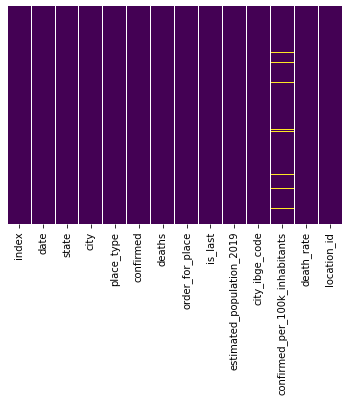

In [29]:
# Missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
# For more details
display(df.isnull().sum().sort_values(ascending=False))

confirmed_per_100k_inhabitants    2748
city_ibge_code                       6
estimated_population_2019            6
location_id                          0
death_rate                           0
is_last                              0
order_for_place                      0
deaths                               0
confirmed                            0
place_type                           0
city                                 0
state                                0
date                                 0
index                                0
dtype: int64

#### Looking for correlations

/home/ubuntu/anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ubuntu/anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


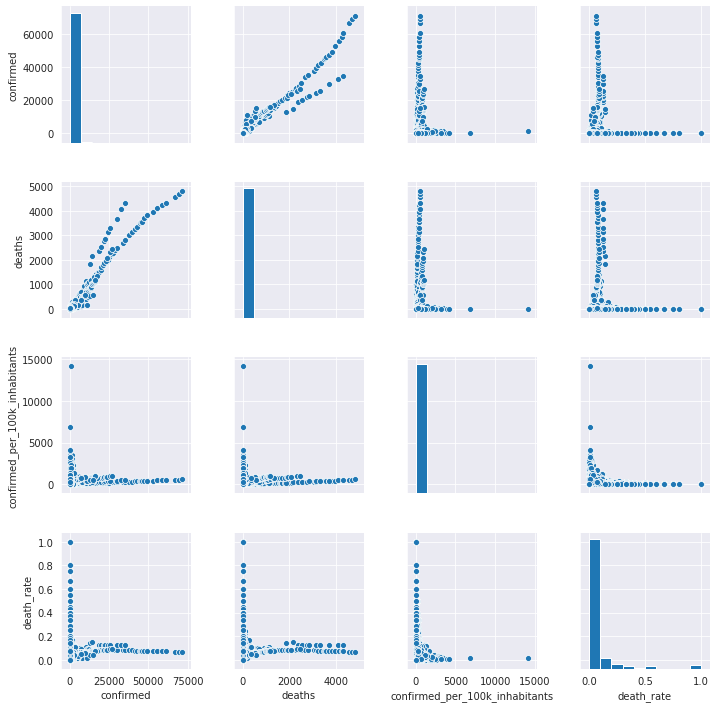

In [31]:
columns = [
    'confirmed',	 
    'deaths', 
    'confirmed_per_100k_inhabitants',
    'death_rate'
]
sns.set_style("darkgrid")
sns.pairplot(df[columns])

### Apparently, the number of deaths and of confirmed cases are positively correlated. Let's verify that:

In [32]:
#from scipy.stats import personsr
pearson_cor = pearsonr(df.deaths, df.confirmed)
print('Pearsons correlation: %.3f' % pearson_cor[0])

Pearsons correlation: 0.973


#### This hypothesis was confirmed, with a very high correlation: 0.973

### Unifying the date column to produce more graphs

In [33]:
# Unify the date column format
df['date'] = pd.to_datetime(df.date).dt.date
# Sort dates
df = df.sort_values('date')
df = df.dropna(subset=['city'])
df = df.loc[df.place_type == 'city']
cumulated = df.groupby('date').agg({'confirmed': 'sum', 
                                    'deaths': 'sum', 
                                    'confirmed_per_100k_inhabitants': 'sum'}).reset_index()

In [34]:
cumulated.head()

,date,confirmed,deaths,confirmed_per_100k_inhabitants
0,2020-02-25,1,0,0.00816
1,2020-02-26,1,0,0.00816
2,2020-02-27,1,0,0.00816
3,2020-02-28,2,0,0.01632
4,2020-02-29,2,0,0.01632


In [35]:
cumulated.describe()

,confirmed,deaths,confirmed_per_100k_inhabitants
count,98.000000,98.000000,98.000000
mean,71221.010204,4594.326531,66932.596135
std,106976.683775,6683.073959,126713.585296
min,1.000000,0.000000,0.008160
25%,719.000000,3.250000,229.970297
50%,22755.000000,1285.000000,10444.265615
75%,93779.750000,6618.750000,60589.375808
max,460001.000000,27062.000000,559448.858040


/home/ubuntu/anaconda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


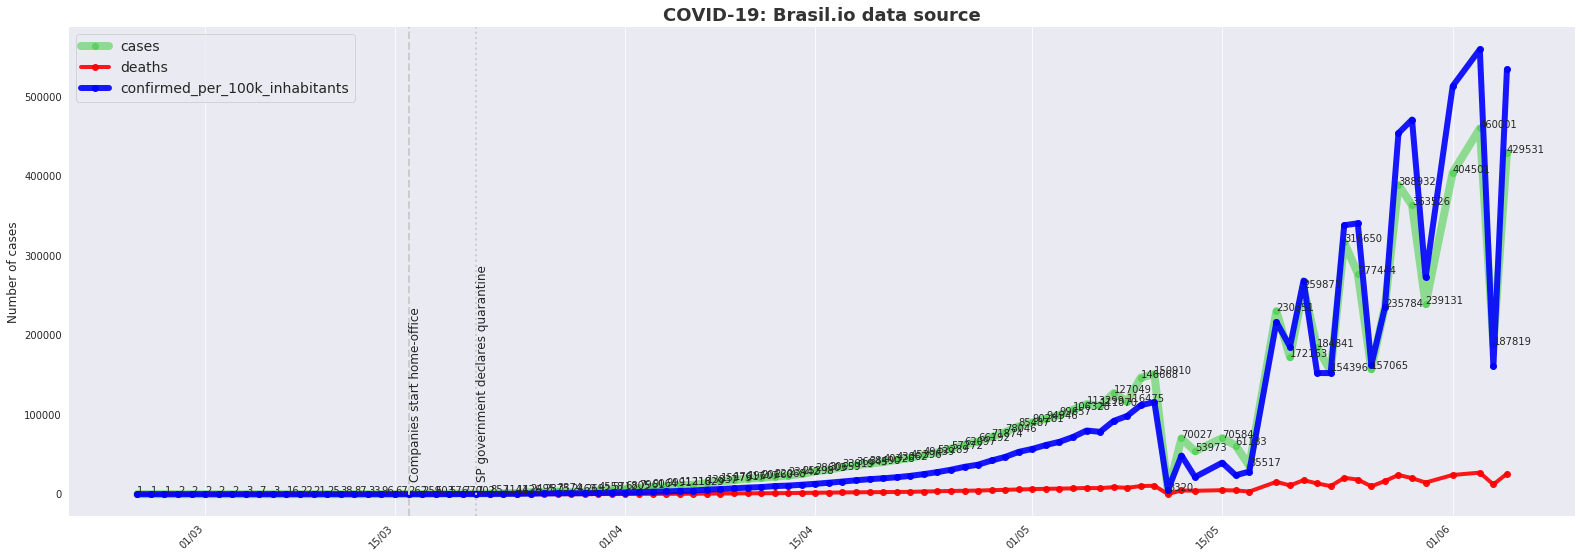

In [36]:
#import matplotlib.pyplot as plt 
#import matplotlib.dates as mdates
#%matplotlib inline

fig, ax = plt.subplots(figsize=(27, 9))

plt.plot(cumulated['date'], cumulated['confirmed'], color='limegreen', linewidth=8, alpha=0.5, marker='o')
plt.plot(cumulated['date'], cumulated['deaths'], color='red', linewidth=4, alpha=0.9, marker='o')
plt.plot(cumulated['date'], cumulated['confirmed_per_100k_inhabitants'], color='blue', linewidth=6, alpha=0.9, marker='o')


[ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated['date'], cumulated['confirmed'])]

plt.xticks(rotation=45, ha='right')
plt.title('COVID-19: Brasil.io data source', fontsize=18, fontweight='bold', color='#333333')

plt.ylabel('Number of cases', fontsize=12)
plt.xlabel(None)

plt.axvline('2020-03-16', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
ax.annotate('Companies start home-office', xy=('2020-03-16',19000), fontsize=12, rotation=90)
plt.axvline('2020-03-21', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
ax.annotate('SP government declares quarantine', xy=('2020-03-21',19000), fontsize=12, rotation=90)

plt.legend(loc=2, labels=['cases','deaths', 'confirmed_per_100k_inhabitants'], fontsize=14)

plt.grid(which='major', axis='y')
[ax.spines[side].set_visible(False) for side in ['left','right','top']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.show();

#### The great variation in the confirmed deaths per 100k inhabitants and the number of cases seem to be caused by the data retrieved from some states, in which the number of cases decreased, instead of increasing along with the time.

In [37]:
np.all(np.diff(cumulated.confirmed) >= 0)

False

In [38]:
np.all(np.diff(cumulated.deaths) >= 0)

False

### Confirmed cases distribution

/home/ubuntu/anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ubuntu/anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/ubuntu/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ubuntu/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


[Text(0.5, 0, '')]

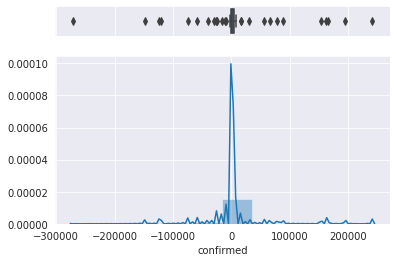

In [39]:
confirmed_cases = cumulated.confirmed.diff()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.set_style("darkgrid")
sns.boxplot(confirmed_cases, ax=ax_box)
sns.distplot(confirmed_cases, bins=10, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

### Death cases distribution

/home/ubuntu/anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ubuntu/anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/ubuntu/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ubuntu/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


[Text(0.5, 0, '')]

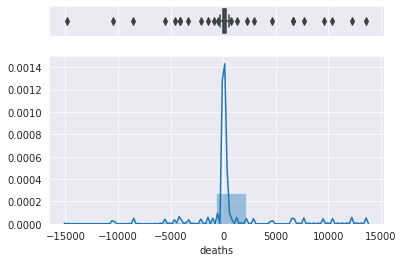

In [40]:
deaths_cases = cumulated.deaths.diff()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.set_style("darkgrid")
sns.boxplot(deaths_cases, ax=ax_box)
sns.distplot(deaths_cases, bins=10, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [41]:
cumulated.deaths.describe()

count       98.000000
mean      4594.326531
std       6683.073959
min          0.000000
25%          3.250000
50%       1285.000000
75%       6618.750000
max      27062.000000
Name: deaths, dtype: float64

## But all states are included in the data, as we can see below, so we can plot only SP data, for instance.

In [42]:
df.state.unique()

array(['SP', 'RJ', 'BA', 'DF', 'MG', 'AL', 'RS', 'GO', 'PE', 'PR', 'RN',
       'SC', 'AM', 'SE', 'MS', 'CE', 'AC', 'PB', 'PA', 'TO', 'ES', 'PI',
       'MT', 'MA', 'AP', 'RO', 'RR'], dtype=object)

In [43]:
df.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
0,17378,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,3550308.0,0.00816,0.0,2680
1,17377,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,3550308.0,0.00816,0.0,2680
2,17376,2020-02-27,SP,São Paulo,city,1,0,3,False,12252023.0,3550308.0,0.00816,0.0,2680
3,17375,2020-02-28,SP,São Paulo,city,2,0,4,False,12252023.0,3550308.0,0.01632,0.0,2680
4,17374,2020-02-29,SP,São Paulo,city,2,0,5,False,12252023.0,3550308.0,0.01632,0.0,2680


In [44]:
df.shape

(107985, 14)

# Analyzing state by state

### Plotting only SP state data

In [45]:
df = brasil_io

In [46]:
# Filtering SP value
SP_boolean = df.state == 'SP'
SP_boolean

df_sp = df[SP_boolean]
df_sp = df_sp.sort_values('date')
df_sp = df_sp.dropna(subset=['city'])

df_sp.shape

(19755, 14)

In [47]:
df.shape

(107985, 14)

In [48]:
df_sp.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
0,17378,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,3550308.0,0.00816,0.0,2680
1,17377,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,3550308.0,0.00816,0.0,2680
2,17376,2020-02-27,SP,São Paulo,city,1,0,3,False,12252023.0,3550308.0,0.00816,0.0,2680
3,17375,2020-02-28,SP,São Paulo,city,2,0,4,False,12252023.0,3550308.0,0.01632,0.0,2680
4,17374,2020-02-29,SP,São Paulo,city,2,0,5,False,12252023.0,3550308.0,0.01632,0.0,2680


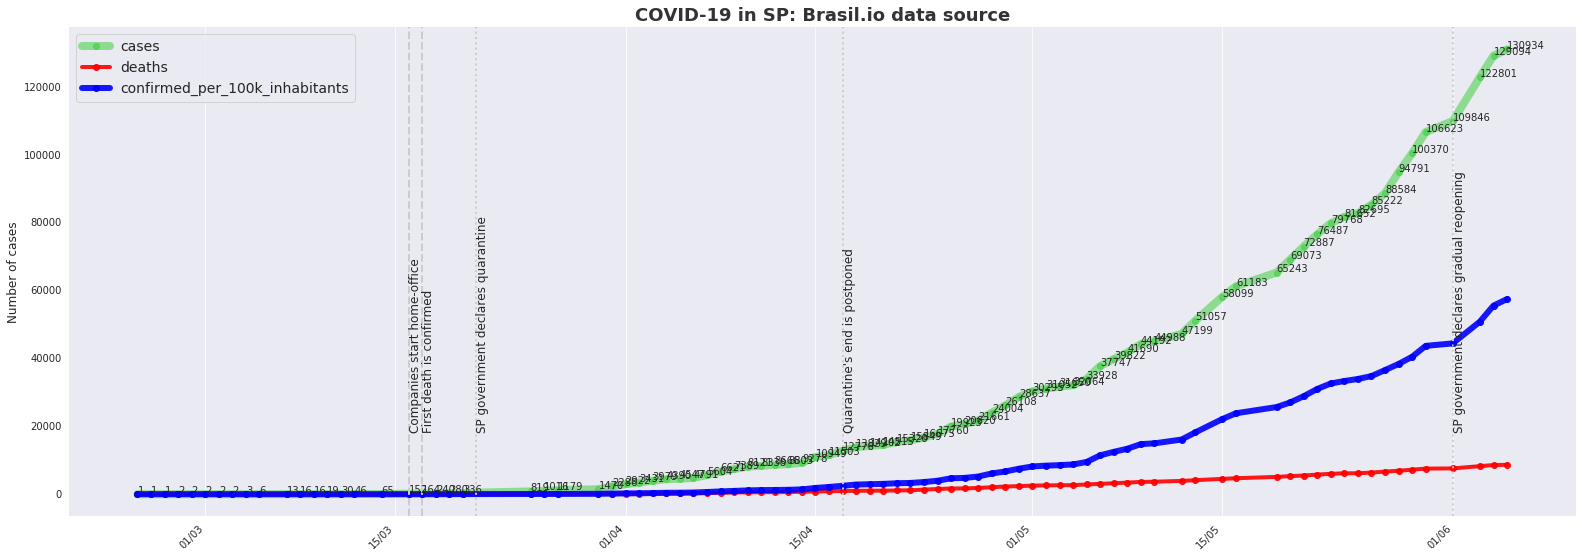

In [49]:
df = brasil_io
state='SP'
column_sort = 'date'
column_filter = 'city'
selected_column1 = 'confirmed'
selected_column2 = 'deaths'
selected_column3 = 'confirmed_per_100k_inhabitants'
title = 'COVID-19 in SP: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering SP value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            # Plotting messages

            plt.axvline('2020-03-16', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('Companies start home-office', xy=('2020-03-16',19000), fontsize=12, rotation=90)

            plt.axvline('2020-03-17', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('First death is confirmed', xy=('2020-03-17',19000), fontsize=12, rotation=90)

            plt.axvline('2020-03-21', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate('SP government declares quarantine', xy=('2020-03-21',19000), fontsize=12, rotation=90)

            plt.axvline('2020-04-17', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate("Quarantine's end is postponed", xy=('2020-04-17',19000), fontsize=12, rotation=90)

            plt.axvline('2020-06-01', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate('SP government declares gradual reopening', xy=('2020-06-01',19000), fontsize=12, rotation=90)

            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### Plotting only MG state data

In [50]:
df = brasil_io

In [51]:
df.state.unique()

array(['SP', 'RJ', 'BA', 'DF', 'MG', 'AL', 'RS', 'SC', 'RN', 'PR', 'PE',
       'GO', 'AM', 'SE', 'MS', 'CE', 'AC', 'TO', 'PA', 'PB', 'PI', 'ES',
       'RO', 'MT', 'MA', 'AP', 'RR'], dtype=object)

In [52]:
df.shape

(107985, 14)

In [53]:
# Filtering SP value
MG_boolean = df.state == 'MG'
MG_boolean

df_mg = df[MG_boolean]

df_mg = df_mg.sort_values('date')
df_mg = df_mg.dropna(subset=['city'])

df_mg.shape

(12321, 14)

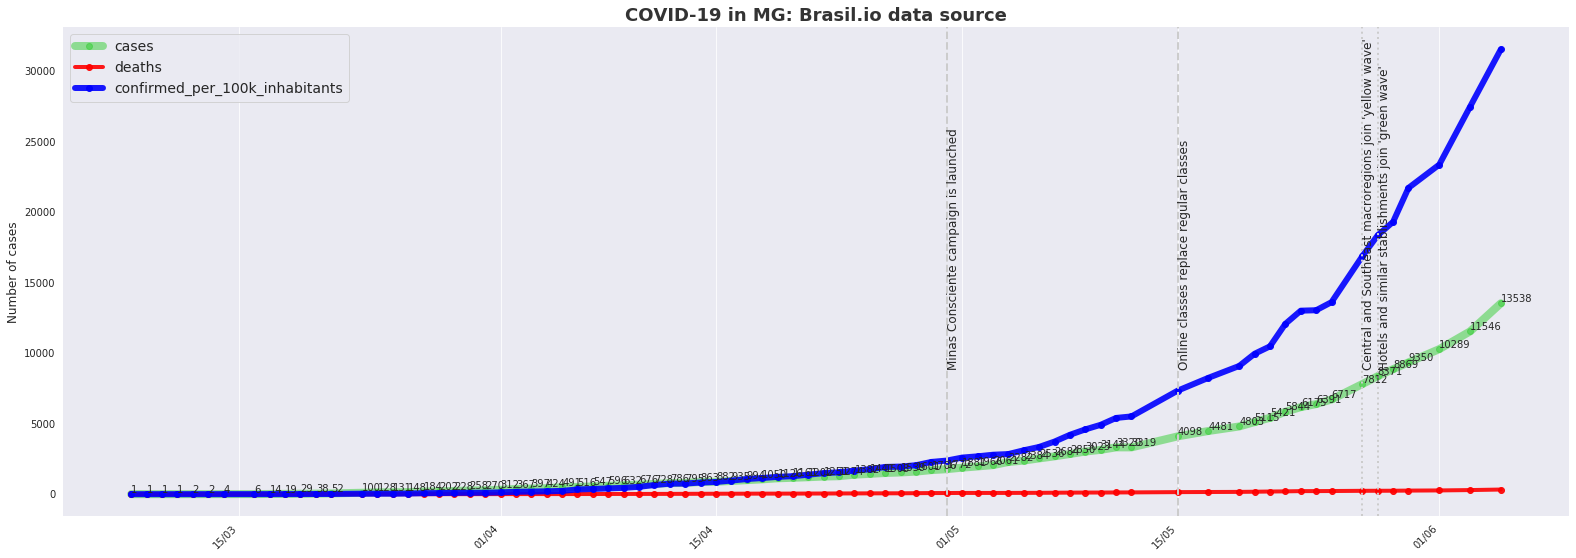

In [54]:
df = brasil_io
state='MG'
column_sort = 'date'
column_filter = 'city'
selected_column1 = 'confirmed'
selected_column2 = 'deaths'
selected_column3 = 'confirmed_per_100k_inhabitants'
title = 'COVID-19 in MG: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering MG value
df = df.loc[df.state == state]

df_shape = df.shape

# if the df is not empty, plot it
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            # Plotting messages

            plt.axvline('2020-04-30', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('Minas Consciente campaign is launched', xy=('2020-04-30',9000), fontsize=12, rotation=90)

            plt.axvline('2020-05-15', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('Online classes replace regular classes', xy=('2020-05-15',9000), fontsize=12, rotation=90)

            plt.axvline('2020-05-27', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate("Central and Southeast macroregions join 'yellow wave'", xy=('2020-05-27',9000), fontsize=12, rotation=90)

            plt.axvline('2020-05-28', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate("Hotels and similar stablishments join 'green wave'", xy=('2020-05-28',9000), fontsize=12, rotation=90)

            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

#### Comparing the cases in Sao Paulo state (SP) and in Minas Gerais state (MG), in SP, the number of cases increased faster than the number of confirmed cases per 100k inhabitants, while the opposite occurred in MG.

Hypothesis - MG possibly performed more testing than SP, so the number of confirmed cases grew fast

### Plotting only Amazonas state data

In [55]:
df = brasil_io

In [56]:
df_am = df.loc[df.state == 'AM']
df_am.shape

(1701, 14)

In [57]:
df_am.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
80,50732,2020-03-13,AM,Manaus,city,2,0,1,False,2182763.0,1302603.0,0.09163,0.0,2173
263,50731,2020-03-18,AM,Manaus,city,2,0,2,False,2182763.0,1302603.0,0.09163,0.0,2173
338,50730,2020-03-19,AM,Manaus,city,3,0,3,False,2182763.0,1302603.0,0.13744,0.0,2173
441,50729,2020-03-20,AM,Manaus,city,7,0,4,False,2182763.0,1302603.0,0.32069,0.0,2173
548,50728,2020-03-21,AM,Manaus,city,11,0,5,False,2182763.0,1302603.0,0.50395,0.0,2173


In [58]:
df_am = df_am.sort_values('date')
df_am = df_am.dropna(subset=['city'])
#df_am = df_am.loc[df.place_type == 'city']
cumulated_am = df_am.groupby('date').agg({'confirmed': 'sum', 
                                    'deaths': 'sum', 
                                    'confirmed_per_100k_inhabitants': 'sum'}).reset_index()

In [59]:
df_am.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
80,50732,2020-03-13,AM,Manaus,city,2,0,1,False,2182763.0,1302603.0,0.09163,0.0,2173
263,50731,2020-03-18,AM,Manaus,city,2,0,2,False,2182763.0,1302603.0,0.09163,0.0,2173
338,50730,2020-03-19,AM,Manaus,city,3,0,3,False,2182763.0,1302603.0,0.13744,0.0,2173
441,50729,2020-03-20,AM,Manaus,city,7,0,4,False,2182763.0,1302603.0,0.32069,0.0,2173
548,50728,2020-03-21,AM,Manaus,city,11,0,5,False,2182763.0,1302603.0,0.50395,0.0,2173


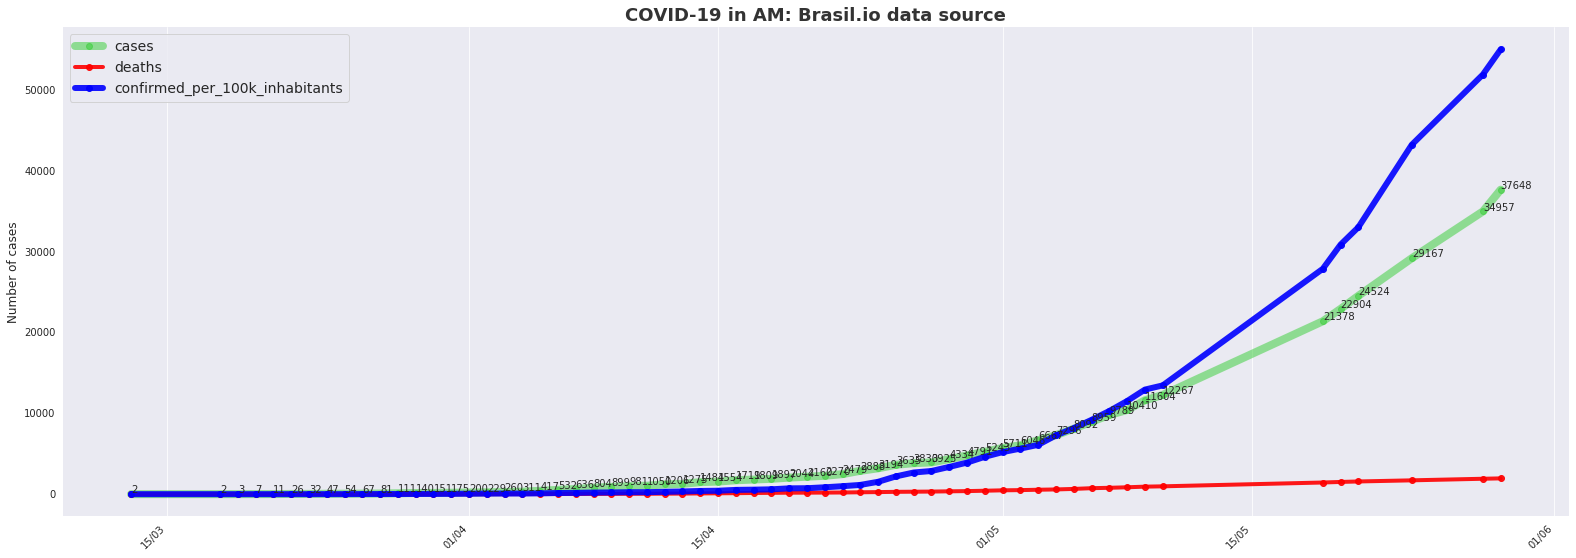

In [60]:
df = brasil_io
state='AM'
column_sort = 'date'
column_filter = 'city'
selected_column1 = 'confirmed'
selected_column2 = 'deaths'
selected_column3 = 'confirmed_per_100k_inhabitants'
title = 'COVID-19 in AM: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AM value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            
            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

#### In the Amazonas state, the number of confirmed deaths is rising with the number of cases.

### Plotting only RS state data

In [61]:
df = brasil_io

In [62]:
df_rs = df.loc[df.state == 'RS']
df_rs.shape

(9105, 14)

In [63]:
df_rs.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
31,1965,2020-03-10,RS,Campo Bom,city,1,0,1,False,66712.0,4303905.0,1.49898,0.0,1072
38,1964,2020-03-11,RS,Campo Bom,city,1,0,2,False,66712.0,4303905.0,1.49898,0.0,1072
39,4026,2020-03-11,RS,Porto Alegre,city,1,0,1,False,1483771.0,4314902.0,0.06740,0.0,3234
45,1963,2020-03-12,RS,Campo Bom,city,1,0,3,False,66712.0,4303905.0,1.49898,0.0,1072
46,2289,2020-03-12,RS,Caxias do Sul,city,1,0,1,False,510906.0,4305108.0,0.19573,0.0,3732


In [64]:
df_rs = df_rs.sort_values('date')
df_rs = df_rs.dropna(subset=['city'])
df_rs = df_rs.loc[df.place_type == 'city']
cumulated_rs = df_rs.groupby('date').agg({'confirmed': 'sum', 
                                    'deaths': 'sum', 
                                    'confirmed_per_100k_inhabitants': 'sum'}).reset_index()

In [65]:
df_rs.head()

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,location_id
31,1965,2020-03-10,RS,Campo Bom,city,1,0,1,False,66712.0,4303905.0,1.49898,0.0,1072
38,1964,2020-03-11,RS,Campo Bom,city,1,0,2,False,66712.0,4303905.0,1.49898,0.0,1072
39,4026,2020-03-11,RS,Porto Alegre,city,1,0,1,False,1483771.0,4314902.0,0.06740,0.0,3234
45,1963,2020-03-12,RS,Campo Bom,city,1,0,3,False,66712.0,4303905.0,1.49898,0.0,1072
46,2289,2020-03-12,RS,Caxias do Sul,city,1,0,1,False,510906.0,4305108.0,0.19573,0.0,3732


In [66]:
cumulated_rs.head()

,date,confirmed,deaths,confirmed_per_100k_inhabitants
0,2020-03-10,1,0,1.49898
1,2020-03-11,2,0,1.56638
2,2020-03-12,4,0,1.82950
3,2020-03-13,4,0,1.82950
4,2020-03-16,8,0,2.09909


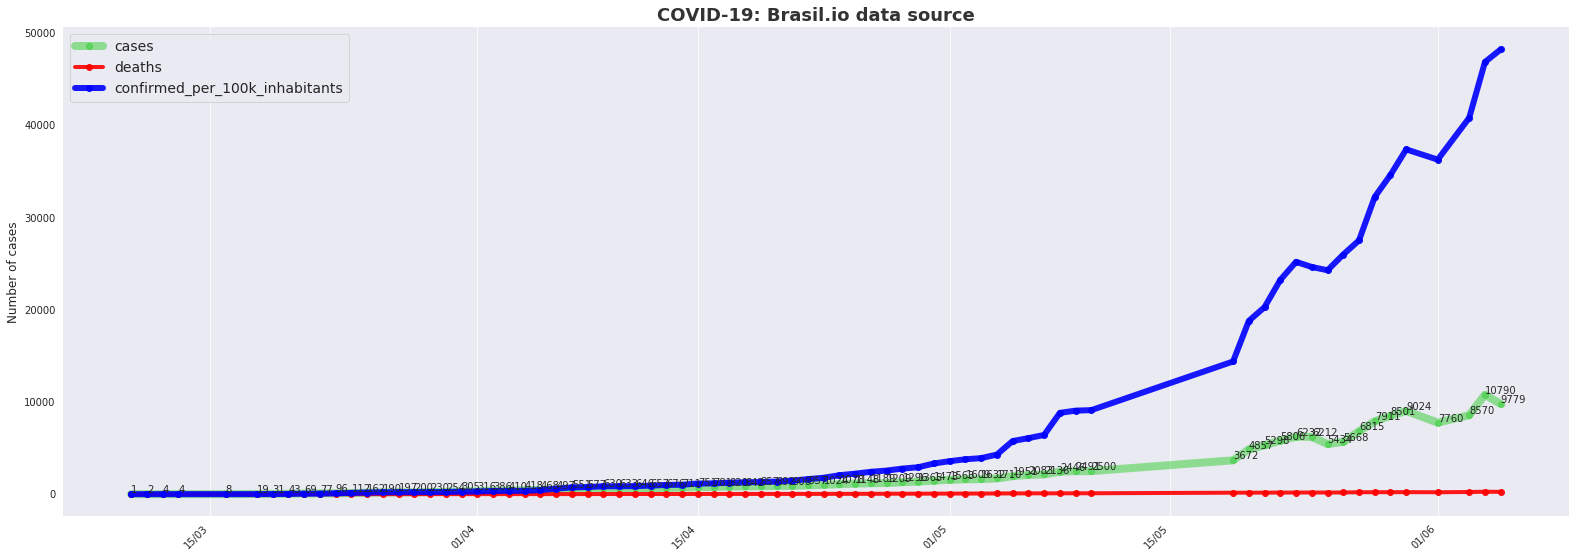

In [67]:
#import matplotlib.pyplot as plt 
#import matplotlib.dates as mdates
#%matplotlib inline

fig, ax = plt.subplots(figsize=(27, 9))

plt.plot(cumulated_rs['date'], cumulated_rs['confirmed'], color='limegreen', linewidth=8, alpha=0.5, marker='o')
plt.plot(cumulated_rs['date'], cumulated_rs['deaths'], color='red', linewidth=4, alpha=0.9, marker='o')
plt.plot(cumulated_rs['date'], cumulated_rs['confirmed_per_100k_inhabitants'], color='blue', linewidth=6, alpha=0.9, marker='o')


[ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated_rs['date'], cumulated_rs['confirmed'])]

plt.xticks(rotation=45, ha='right')
plt.title('COVID-19: Brasil.io data source', fontsize=18, fontweight='bold', color='#333333')

plt.ylabel('Number of cases', fontsize=12)
plt.xlabel(None)

#plt.axvline('2020-03-16', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
#ax.annotate('Companies start home-office', xy=('2020-03-16',19000), fontsize=12, rotation=90)
#plt.axvline('2020-03-17', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
#ax.annotate('First death is confirmed', xy=('2020-03-17',19000), fontsize=12, rotation=90)
#plt.axvline('2020-03-21', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
#ax.annotate('SP government declares quarantine', xy=('2020-03-21',19000), fontsize=12, rotation=90)
#plt.axvline('2020-04-17', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
#ax.annotate("Quarantine's end is postponed", xy=('2020-04-17',19000), fontsize=12, rotation=90)
#plt.axvline('2020-06-01', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
#ax.annotate('SP government declares gradual reopening', xy=('2020-06-01',19000), fontsize=12, rotation=90)

plt.legend(loc=2, labels=['cases','deaths', 'confirmed_per_100k_inhabitants'], fontsize=14)

plt.grid(which='major', axis='y')
[ax.spines[side].set_visible(False) for side in ['left','right','top']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.show();

### Plotting only Espirito Santo state data

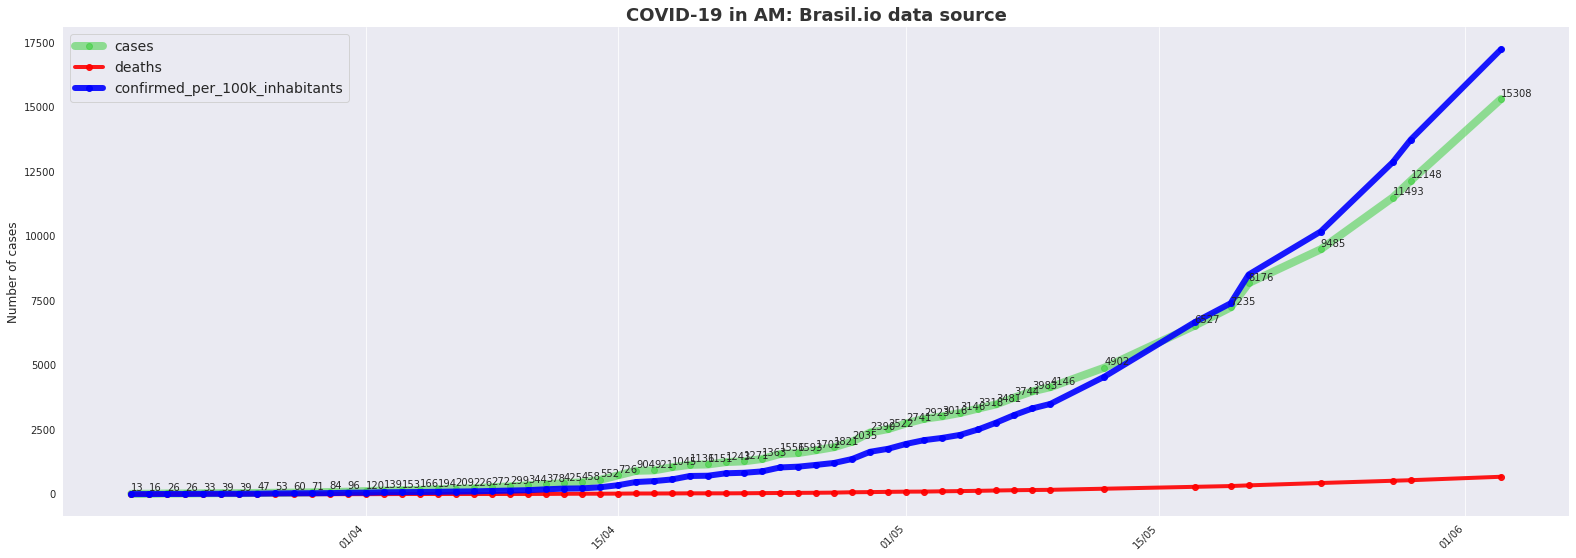

In [68]:
df = brasil_io
state='ES'
column_sort = 'date'
column_filter = 'city'
selected_column1 = 'confirmed'
selected_column2 = 'deaths'
selected_column3 = 'confirmed_per_100k_inhabitants'
title = 'COVID-19 in AM: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering ES value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            
            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### In this case, the increase in the cases was followed closely by an increase of the number of deaths.

### In some states, though, there was a decrease at some point, which explains the peaks in the general graph

### Acre

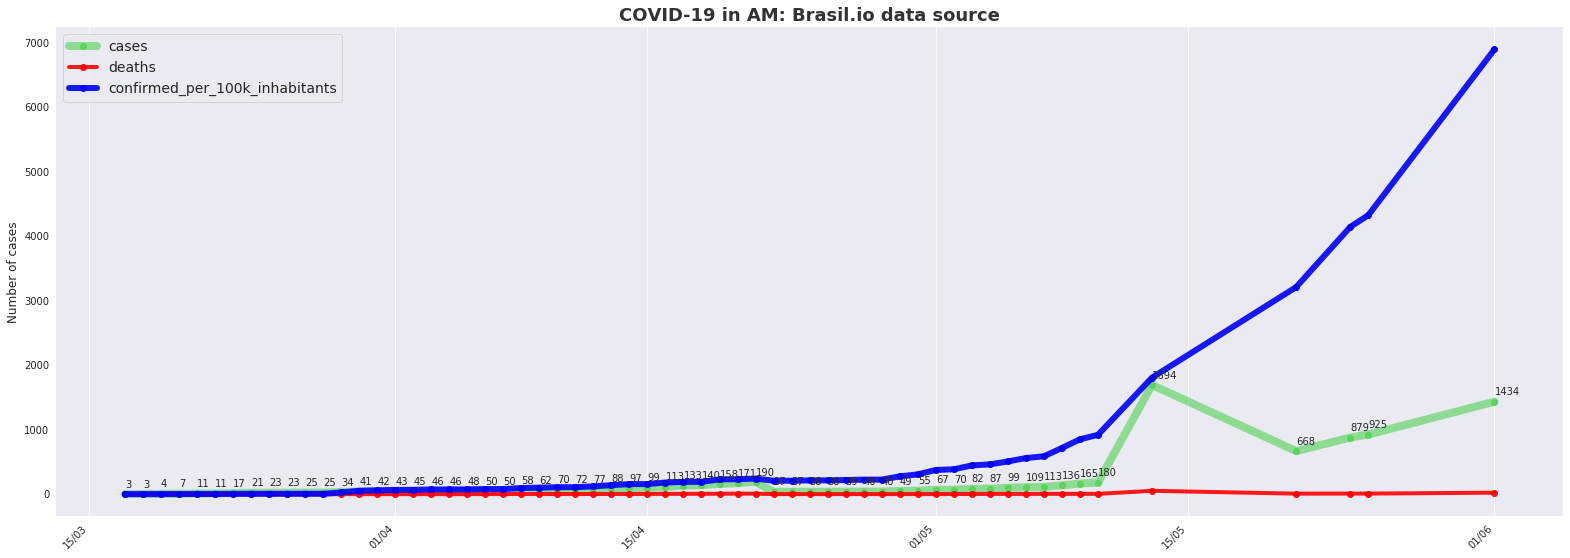

In [69]:
df = brasil_io
state='AC'
column_sort = 'date'
column_filter = 'city'
selected_column1 = 'confirmed'
selected_column2 = 'deaths'
selected_column3 = 'confirmed_per_100k_inhabitants'
title = 'COVID-19 in AM: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AC value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            
            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### Roraima

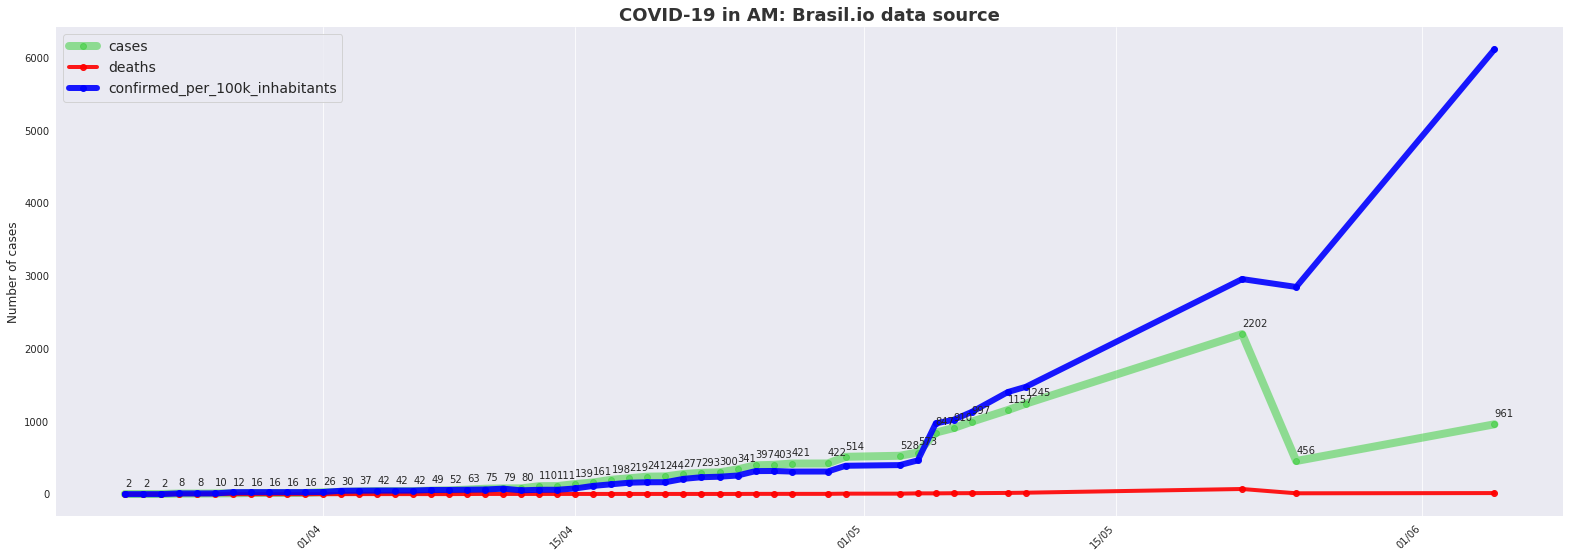

In [70]:
df = brasil_io
state='RR'
column_sort = 'date'
column_filter = 'city'
selected_column1 = 'confirmed'
selected_column2 = 'deaths'
selected_column3 = 'confirmed_per_100k_inhabitants'
title = 'COVID-19 in AM: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering RR value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            
            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### Mato Grosso do Sul

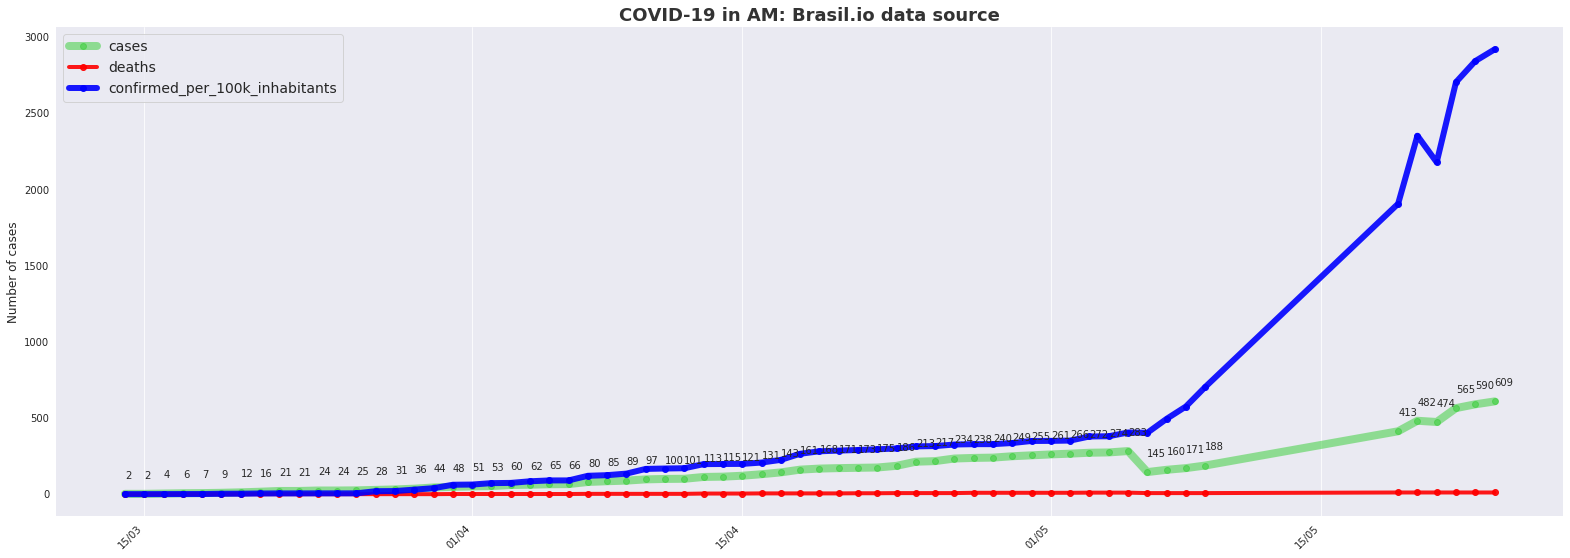

In [71]:
df = brasil_io
state='MS'
column_sort = 'date'
column_filter = 'city'
selected_column1 = 'confirmed'
selected_column2 = 'deaths'
selected_column3 = 'confirmed_per_100k_inhabitants'
title = 'COVID-19 in AM: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering MS value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            
            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

#### In the RS state, while the number of cases remains more stable as in other states, the number of confirmed deaths is still rising at a high rate

### Conclusion

#### As a conclusion, the general behavior was erratic due to the influence of different states' data. So, further studies are necessary using, preferably, modelling or machine learning to describe the main features as soon as new information is released.

## *Developed by*

 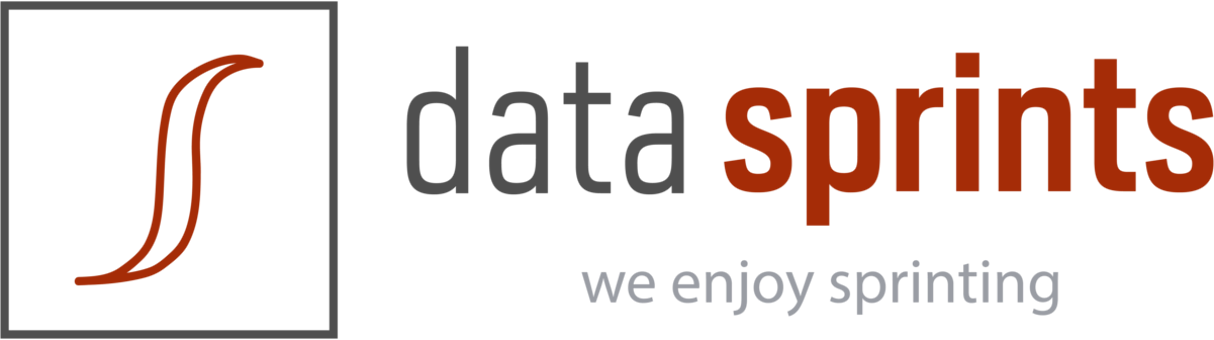